<a href="https://colab.research.google.com/github/ian-mungai/ML-Final-Group-Task/blob/main/Image_Classification_(ML_Final_Group_Task).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Members:<br>
112490-Ian Mungai<br>
110450-Makena Mbui<br>
107948-Victor Mumo<br>
112829-Janice Malu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

To access the shared drive, kindly use your strathmore email.

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Configuring the Kaggle path
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/Shareddrives/Kaggle"

In [ ]:
#Change the present working directory
%cd /content/drive/Shareddrives/Kaggle

/content/drive/Shareddrives/Kaggle


In [ ]:
#Download the Kaggle dataset
!kaggle datasets download -d chetankv/dogs-cats-images

 99% 432M/435M [00:05<00:00, 75.0MB/s]
100% 435M/435M [00:05<00:00, 78.1MB/s]


In [ ]:
#Unzipping the data and remove the zip file
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: dog vs cat/dataset/training_set/cats/cat.37.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.370.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3700.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3701.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3702.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3703.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3704.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3705.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3706.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3707.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3708.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3709.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.371.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3710.jpg  
  inflating: dog vs cat/dataset/training_se

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "/content/drive/Shareddrives/Kaggle/dataset/training_set"
test_dir = "/content/drive/Shareddrives/Kaggle/dataset/test_set"
IMG_WIDTH = 128
IMG_HEIGHT = 128
BATCH_SIZE = 200

Reading the data

In [ ]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=20,
    validation_split=0.2
)
test_generator = ImageDataGenerator(
    rescale=1./255
)
train_data = train_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset='training',# training subset
)
val_data = train_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset='validation',# validation subset
)
test_data = test_generator.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary",
)

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Creating the model

In [ ]:
model = keras.Sequential([
    layers.Conv2D(64, (3,3), input_shape=[IMG_WIDTH, IMG_HEIGHT, 3]),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(32, (3,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(32, (3,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(16, (3,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 16)        4

Training the model

In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["binary_accuracy"]
)
history = model.fit(
    train_data,
    epochs=25,
    validation_data=val_data
)

Epoch 1/25
32/32 [==============================] - 280s 9s/step - loss: 0.6903 - binary_accuracy: 0.5420 - val_loss: 0.6673 - val_binary_accuracy: 0.5900
Epoch 2/25
32/32 [==============================] - 277s 9s/step - loss: 0.6533 - binary_accuracy: 0.6103 - val_loss: 0.6402 - val_binary_accuracy: 0.6231
Epoch 3/25
32/32 [==============================] - 267s 8s/step - loss: 0.6263 - binary_accuracy: 0.6533 - val_loss: 0.5942 - val_binary_accuracy: 0.6831
Epoch 4/25
32/32 [==============================] - 273s 8s/step - loss: 0.5905 - binary_accuracy: 0.6789 - val_loss: 0.6303 - val_binary_accuracy: 0.6456
Epoch 5/25
32/32 [==============================] - 285s 9s/step - loss: 0.5774 - binary_accuracy: 0.6948 - val_loss: 0.5601 - val_binary_accuracy: 0.7094
Epoch 6/25
32/32 [==============================] - 267s 8s/step - loss: 0.5494 - binary_accuracy: 0.7189 - val_loss: 0.5651 - val_binary_accuracy: 0.7031
Epoch 7/25
32/32 [==============================] - 265s 8s/step - los

Evaluating the model by calculating the accuracy

In [ ]:
#The accuracy is approximately 80%
loss, acc = model.evaluate(test_data)
print(acc)

10/10 [==============================] - 23s 2s/step - loss: 0.4654 - binary_accuracy: 0.7920
0.7919999957084656


Testing with some images

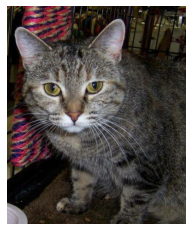

In [ ]:
path = "/content/drive/Shareddrives/Kaggle/dataset/test_set/cats/cat.4067.jpg"
image = tf.io.read_file(path)
image = tf.io.decode_jpeg(image)
plt.axis(False)
plt.imshow(image)
plt.show()
image = tf.image.resize(image, size=[128, 128])
image.shape
x = tf.expand_dims(image, axis=0)

In [ ]:
#trying to predict whether the image above is a cat or dog
prediction = model.predict(x)
index = round(prediction[0][0])
["cat", "dog"][index]

'cat'

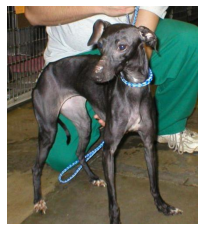

In [ ]:
path = "/content/drive/Shareddrives/Kaggle/dataset/test_set/dogs/dog.4004.jpg"
image = tf.io.read_file(path)
image = tf.io.decode_jpeg(image)
plt.axis(False)
plt.imshow(image)
plt.show()
image = tf.image.resize(image, size=[128, 128])
image.shape
x = tf.expand_dims(image, axis=0)

In [ ]:
#trying to predict whether the image above is a cat or dog
prediction = model.predict(x)
index = round(prediction[0][0])
["cat", "dog"][index]

'dog'